In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file into a DataFrame
file_path = 'data.csv'  # Update with the path to your CSV file
data = pd.read_csv(file_path)

In [3]:
# Display the head rows of the DataFrame
data.head()

,Start Year,Start Month,Start Day,End Year,End Month,End Day,Location,Total Deaths,No. Affected,Total Affected,Insured Damage ('000 US$),Total Damage ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude
0,2002,9,20,2002,9,20,Campeche,13.0,500000.0,500030.0,280000.0,640000.0,180.0,Kph,19.000000,-90.500000
1,2002,9,20,2002,9,20,Quintana Roo,13.0,500000.0,500030.0,280000.0,640000.0,180.0,Kph,19.666667,-88.500000
2,2002,9,26,2002,9,27,Louisiane,1.0,13200.0,13200.0,200000.0,300000.0,105.0,Kph,30.870388,-92.007126
3,2002,9,26,2002,9,27,Mississippi,1.0,13200.0,13200.0,200000.0,300000.0,105.0,Kph,32.971528,-89.734850
4,2002,9,26,2002,9,27,Alabama,1.0,13200.0,13200.0,200000.0,300000.0,105.0,Kph,33.258882,-86.829534


In [4]:
cols_to_convert = [
    'Total Deaths',
    'No. Affected',
    'Total Affected',
    'Insured Damage (\'000 US$)',
    'Total Damage (\'000 US$)',
    'Magnitude'
]

for col in cols_to_convert:
    if col in data.columns:
        data[col] = data[col].fillna(0).astype('int64')

In [5]:
# Summary statistics of the data
data.describe()

,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,Insured Damage ('000 US$),Total Damage ('000 US$),Magnitude,Latitude,Longitude
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,1.990000e+02,199.000000,199.000000,199.000000
mean,2012.376884,8.366834,20.231156,2012.376884,8.512563,20.819095,225.306533,315611.557789,326361.386935,2.168883e+07,5.717537e+07,208.693467,31.102705,-83.926900
std,6.002833,0.652196,7.921766,6.002833,0.680607,8.630896,524.870741,247189.525736,257735.346413,1.767335e+07,4.567496e+07,52.891651,9.088798,30.204265
min,2002.000000,6.000000,1.000000,2002.000000,6.000000,1.000000,1.000000,600.000000,600.000000,8.400000e+04,3.000000e+05,65.000000,-36.598610,-122.714105
25%,2005.000000,8.000000,13.000000,2005.000000,8.000000,13.000000,14.000000,30000.000000,30000.000000,7.600000e+06,1.300000e+07,200.000000,29.387225,-95.995338
50%,2016.000000,8.000000,25.000000,2016.000000,8.000000,22.000000,88.000000,500000.000000,500000.000000,3.000000e+07,6.500000e+07,215.000000,30.694360,-90.500000
75%,2017.000000,9.000000,25.000000,2017.000000,9.000000,29.000000,88.000000,555000.000000,582024.000000,3.000000e+07,9.500000e+07,230.000000,35.489198,-82.900938
max,2023.000000,10.000000,29.000000,2023.000000,10.000000,29.000000,1833.000000,988000.000000,988000.000000,6.000000e+07,1.250000e+08,280.000000,49.729099,144.678005


In [6]:
data.dtypes

Start Year                     int64
Start Month                    int64
Start Day                      int64
End Year                       int64
End Month                      int64
End Day                        int64
Location                      object
Total Deaths                   int64
No. Affected                   int64
Total Affected                 int64
Insured Damage ('000 US$)      int64
Total Damage ('000 US$)        int64
Magnitude                      int64
Magnitude Scale               object
Latitude                     float64
Longitude                    float64
dtype: object

In [7]:
# Check for missing values
data.isnull().sum()

Start Year                   0
Start Month                  0
Start Day                    0
End Year                     0
End Month                    0
End Day                      0
Location                     0
Total Deaths                 0
No. Affected                 0
Total Affected               0
Insured Damage ('000 US$)    0
Total Damage ('000 US$)      0
Magnitude                    0
Magnitude Scale              0
Latitude                     0
Longitude                    0
dtype: int64

In [8]:
data.rename(columns={'Insured Damage (\'000 US$)': 'Insured Damage ($)'}, inplace=True)
data.rename(columns={'Total Damage (\'000 US$)': 'Total Damage ($)'}, inplace=True)

In [9]:
#entries_by_year = data['Start Year'].value_counts().sort_index()
entries_by_month_year = data.groupby(['Start Year', 'Start Month']).size().unstack(fill_value=0)
entries_by_month_year

Start Month,6,8,9,10
Start Year,,,,
2002,0,0,5,0
2003,0,0,7,0
2004,0,18,0,0
2005,0,19,2,3
2007,0,5,0,0
2008,0,0,13,0
2010,0,0,3,0
2011,0,0,11,0
2012,2,0,0,0


C:\Users\mcmul\AppData\Local\Temp\ipykernel_32276\3099990105.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Start Year', y='Insured Damage ($)', data=data, estimator=sum, ci=None)


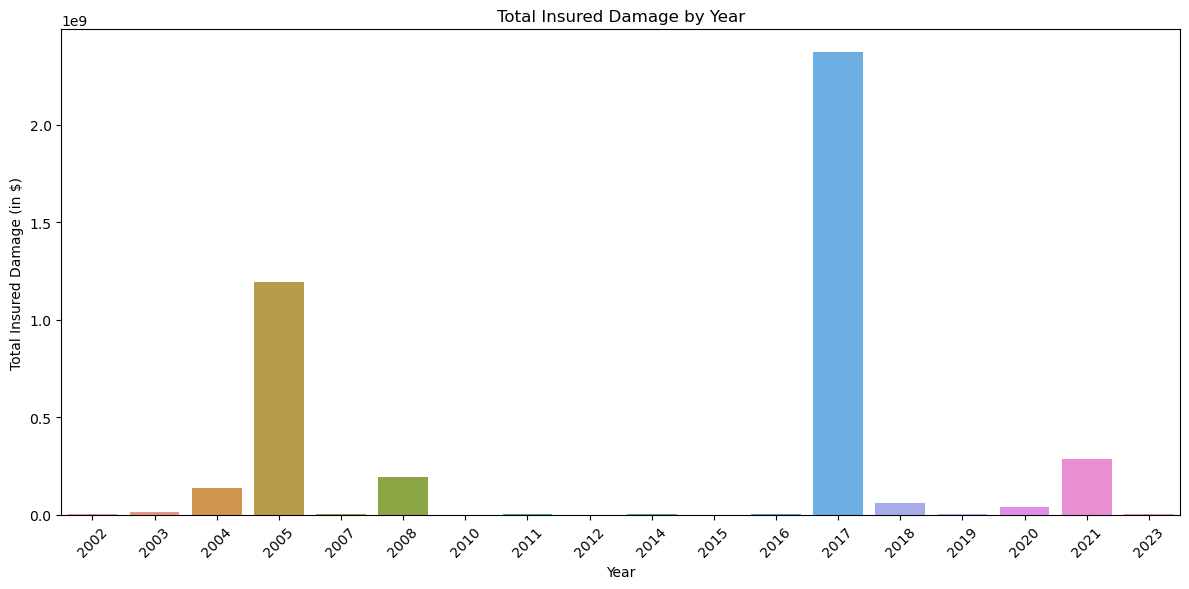

In [10]:
# Visualization of Insured Damage by Year
plt.figure(figsize=(12, 6))
sns.barplot(x='Start Year', y='Insured Damage ($)', data=data, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title('Total Insured Damage by Year')
plt.xlabel('Year')
plt.ylabel('Total Insured Damage (in $)')
plt.tight_layout()
plt.show()